In [23]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Load data

url: "https://en.wikipedia.org/wiki/List_of_songs_about_bicycles"

Pdf converted to csv file using pdftables.com

In [24]:
raw = pd.read_csv("BikeSongs_06 2023.csv")

In [25]:
df = raw.copy()

# drop all empty rows
df = df.dropna(how='all').reset_index(drop=True)

# rename columns
new_column_names = {
    'Artist': 'Artist',
    'Title [language, genre, if not pop or rock]': 'Title_raw',
    'Source/Collection [Rereleased/Year]': 'Collection',
    'Origin Yr.': 'Year_raw',
    'Label [self or unknown]': 'Label'
}
df.rename(columns=new_column_names, inplace=True)

# clean title
df['Title'] = df['Title_raw'].str.split('[', expand=True)[0]
df['Title_info'] = df['Title_raw'].str.split('[', expand=True)[1]

# clean up year
replacement_mapping = {
    'c. ': '',
    'c.': '',
    'b. ':'',
    '\[unk.\]': None,
    "’s": '',
    '1927-2013': '2013',
    '1970, 2005': '2005'
}
df['Year'] = pd.to_numeric(df['Year_raw'].replace(replacement_mapping, regex=True), errors='coerce')

df

,Artist,Title_raw,Collection,Label,Year_raw,Title,Title_info,Year
0,- 17 different artists -,[23 songs about Tour de France],100th Tour de France [complilation],Puzzle Productions,2013,,23 songs about Tour de France],2013.0
1,- 17 different artists -,"[Texas bicycling culture, indie]",The Peek-a-Boo Bicycle Rodeo [comp.],Peek-a-Boo Records,1995,,"Texas bicycling culture, indie]",1995.0
2,- 19 different artists -,"[22 songs, no specific titles, glitch beats]",Bike Grooves [comp.],Olavbelgoe,2010,,"22 songs, no specific titles, glitch beats]",2010.0
3,- 24 different artists -,"[24 songs, Radio France]",Le Velo En Chansons [comp.],Harmonia Mundi,1995,,"24 songs, Radio France]",1995.0
4,- 26 different artists -,"[26 songs, Tour de France official collection]",Le Tour de France en Chansons [comp.],Lm Music,2012,,"26 songs, Tour de France official collection]",2012.0
...,...,...,...,...,...,...,...,...
2321,Zoey van Goey’s,We Don't Have That Kind of Bread,The Cage Was Unlocked All Along,Chemikal Underground,2009,We Don't Have That Kind of Bread,None,2009.0
2322,"Zonana, Saul",Fool on a bicycle,Guinea Pigs,BCI,2006,Fool on a bicycle,None,2006.0
2323,"Zucker, Laurel",Bicycling Uphill for Flute & Double Bass,Journeys,Cantilena Rec.,2011,Bicycling Uphill for Flute & Double Bass,None,2011.0
2324,"Zuckowski, Rolf","An meinem Fahrrad ist alles dran [juv.,\n“Ever...",Der Spielmann-Das Beste,MFD,1997,An meinem Fahrrad ist alles dran,"juv.,\n“Everything is to my bicycle”]",1997.0


## Get data from Spotify API

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [19]:
import os
import configparser

#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
config_file =  os.path.join(root, "config.cfg")

# get Spotify api credentials
config = configparser.ConfigParser()
config.read(config_file)
CLIENT_ID = config["spotify"]["id"]
CLIENT_SECRET = config["spotify"]["secret"]

In [9]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [14]:
# Fetch a track by its Spotify ID
track_id = '2QjOHCTQ1Jl3zawyYOpxh6'
track = sp.track(track_id)
print(track['name'], 'by', track['artists'][0]['name'])

Sweater Weather by The Neighbourhood


In [20]:
# get audio features
features = sp.audio_features(tracks=[track["uri"]])
features

[{'danceability': 0.612,
  'energy': 0.807,
  'key': 10,
  'loudness': -2.81,
  'mode': 1,
  'speechiness': 0.0336,
  'acousticness': 0.0495,
  'instrumentalness': 0.0177,
  'liveness': 0.101,
  'valence': 0.398,
  'tempo': 124.053,
  'type': 'audio_features',
  'id': '2QjOHCTQ1Jl3zawyYOpxh6',
  'uri': 'spotify:track:2QjOHCTQ1Jl3zawyYOpxh6',
  'track_href': 'https://api.spotify.com/v1/tracks/2QjOHCTQ1Jl3zawyYOpxh6',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2QjOHCTQ1Jl3zawyYOpxh6',
  'duration_ms': 240400,
  'time_signature': 4}]

In [84]:
query = "track:%An%meinem%Fahrrad%ist%alles%dran"
#query = "artist:Zuckowski"

In [108]:
query = "track:%"+"Fool on a bicycle".replace(" ", "%")

In [109]:
query

'track:%Fool%on%a%bicycle'

In [111]:
track = sp.search(query, limit=10, type='track', market=None)
#track["tracks"].items()
#track["tracks"]["items"][0]["artists"]
#track["tracks"]["items"][0]["name"]
track["tracks"].items()

dict_items([('href', 'https://api.spotify.com/v1/search?query=track%3A%25Fool%25on%25a%25bicycle&type=track&offset=0&limit=10'), ('items', [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ilYV5oF8whllOnm4VZlYR'}, 'href': 'https://api.spotify.com/v1/artists/6ilYV5oF8whllOnm4VZlYR', 'id': '6ilYV5oF8whllOnm4VZlYR', 'name': 'the pillows', 'type': 'artist', 'uri': 'spotify:artist:6ilYV5oF8whllOnm4VZlYR'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', '

In [39]:
df[["Title", "Artist"]]

,Title,Artist
0,,- 17 different artists -
1,,- 17 different artists -
2,,- 19 different artists -
3,,- 24 different artists -
4,,- 26 different artists -
...,...,...
2321,We Don't Have That Kind of Bread,Zoey van Goey’s
2322,Fool on a bicycle,"Zonana, Saul"
2323,Bicycling Uphill for Flute & Double Bass,"Zucker, Laurel"
2324,An meinem Fahrrad ist alles dran,"Zuckowski, Rolf"


{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2qn4hIXsvRUyFoboMi31XB'},
    'href': 'https://api.spotify.com/v1/artists/2qn4hIXsvRUyFoboMi31XB',
    'id': '2qn4hIXsvRUyFoboMi31XB',
    'name': 'Rolf Zuckowski',
    'type': 'artist',
    'uri': 'spotify:artist:2qn4hIXsvRUyFoboMi31XB'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW

In [27]:
df["Title"]


0                                               
1                                               
2                                               
3                                               
4                                               
                          ...                   
2321            We Don't Have That Kind of Bread
2322                           Fool on a bicycle
2323    Bicycling Uphill for Flute & Double Bass
2324           An meinem Fahrrad ist alles dran 
2325                                     Bicycle
Name: Title, Length: 2326, dtype: object

## Explore

In [138]:
pivot = df[df["Year"]>=1950]
pivot = pivot.groupby("Year")["Title"].count().reset_index()

import numpy as np
helper = pd.DataFrame()
helper["Year"] = np.arange(1950,2023,1)
pivot = pd.merge(helper, pivot, how="outer", on="Year").fillna(0)
pivot

,Year,Title
0,1950.0,6.0
1,1951.0,2.0
2,1952.0,2.0
3,1953.0,0.0
4,1954.0,0.0
...,...,...
69,2019.0,32.0
70,2020.0,24.0
71,2021.0,19.0
72,2022.0,17.0


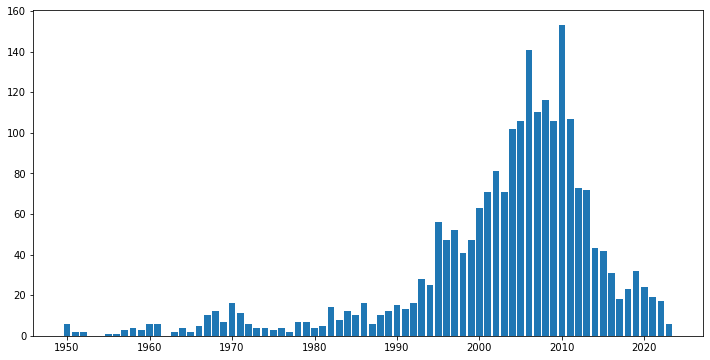

In [149]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(pivot["Year"], pivot["Title"])
plt.show()

## Get data

In [ ]:
# Initialize a list to hold the data
data = []

# Loop through all the pages to extract text
for page_num in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[page_num]
    text = page.extract_text()
    
    # Split the text into lines
    lines = text.split('-')
    
    # Extract relevant data from lines and append to data list
    for line in lines:
        # Clean up the line
        line = line.strip()
        # Split the line into columns based on predefined structure
        if line:
            parts = line.split(' - ')
            if len(parts) >= 5:
                artist = parts[0].strip()
                title = parts[1].strip()
                source = parts[2].strip()
                label = parts[3].strip()
                origin_year = parts[4].strip()
                data.append([artist, title, source, label, origin_year])

# Close the PDF file
#pdf.close()

In [ ]:
page = pdf_reader.pages[0]
text = page.extract_text()

# Split the text into lines
lines = re.split(r"(\d{4})", text)
def combine_items_in_pairs(item_list):
    combined_pairs = []
    for i in range(0, len(item_list), 2):
        if i + 1 < len(item_list):
            combined_pairs.append(f"{item_list[i]} ++ {item_list[i + 1]}")
        else:
            combined_pairs.append(item_list[i])  # Handle odd number of items
    return combined_pairs

lines = combine_items_in_pairs(lines)
lines